In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# general
import pandas as pd
import numpy as np

# explore/ stat
import scipy.stats as stats

# visuals
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


# default pandas decimal display formatting
pd.options.display.float_format='{:20,.2f}'.format

# support modules
import env
import acquire
#import acquire_others
# import prepare
# import summarize

ModuleNotFoundError: No module named 'acquire_others'

In [6]:
df.head()

,county,state,logerror,transactiondate,id,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,...,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
parcelid,,,,,,,,,,,,,,,,,,,,,
17052889,Ventura,CA,0.06,2017-01-01,1387261,nan,1.00,2.00,nan,1.00,...,None,nan,"61,110,010,023,006.00",None,None,None,None,Single Family Residential,None,None
17143294,Ventura,CA,-0.02,2017-01-01,1447245,nan,2.00,3.00,nan,2.00,...,None,nan,"61,110,053,062,009.00",None,None,None,None,Condominium,None,None
17110996,Ventura,CA,0.01,2017-01-02,43675,nan,2.50,3.00,nan,2.50,...,None,nan,"61,110,050,041,163.00",None,None,None,None,Single Family Residential,None,None
17153340,Ventura,CA,-0.10,2017-01-02,1327940,nan,3.50,2.00,nan,3.50,...,None,nan,"61,110,036,093,023.00",None,None,None,None,Condominium,None,None
17153706,Ventura,CA,0.03,2017-01-02,1431120,nan,2.50,2.00,nan,2.50,...,None,nan,"61,110,036,093,015.00",None,None,None,None,Condominium,None,None


Acquire data from mySQL using the python module to connect and query. 

**Deliverable: create acquire.py**

- single dataframe

- content requirements:
> logerror
>
> all fields
>
> airconditioningtypeid
>
> all properties having transaction in 2017, 
>
> include only the last transaction for each properity = no duplicate property id's
>
> zestimate error 
>
> date of transaction
> 
> only include properties that include a latitude and longitude value

In [3]:
df = acquire.get_data_from_mysql()
df = acquire.basic_clean(df)

In [4]:
df.describe()

,logerror,id,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,...,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,"77,381.00","77,381.00",50.00,"77,381.00","77,381.00","49,672.00","76,772.00",614.00,"6,023.00","77,185.00",...,"77,118.00","17,560.00",172.00,"77,269.00","77,380.00","77,381.00","77,379.00","77,376.00","2,886.00","77,137.00"
mean,0.02,"1,495,138.90",679.72,2.30,3.05,6.53,2.32,66.00,"1,366.51","1,785.22",...,"1,968.64",1.43,1.00,"189,314.53","490,134.48","2,016.00","301,095.41","5,995.53",14.09,"60,496,733,646,264.24"
std,0.17,"860,907.05",689.70,1.00,1.14,1.72,0.98,0.00,671.31,954.05,...,23.79,0.54,0.00,"230,087.42","653,443.97",0.00,"492,596.03","7,622.84",2.19,"1,535,241,981,138.57"
min,-4.66,349.00,38.00,0.00,0.00,1.00,1.00,66.00,44.00,128.00,...,"1,824.00",1.00,1.00,44.00,"1,000.00","2,016.00",161.00,19.92,3.00,"60,371,011,101,000.00"
25%,-0.02,"752,070.00",273.00,2.00,2.00,6.00,2.00,66.00,955.00,"1,182.00",...,"1,953.00",1.00,1.00,"84,265.00","207,000.00","2,016.00","85,504.00","2,715.63",14.00,"60,373,109,005,002.00"
50%,0.01,"1,497,932.00",515.00,2.00,3.00,6.00,2.00,66.00,"1,257.00","1,543.00",...,"1,970.00",1.00,1.00,"136,499.00","358,975.50","2,016.00","203,372.00","4,450.69",15.00,"60,376,032,003,008.00"
75%,0.04,"2,240,535.00",796.50,3.00,4.00,8.00,3.00,66.00,"1,615.00","2,113.00",...,"1,987.00",2.00,1.00,"218,787.00","569,001.50","2,016.00","366,796.50","6,927.79",15.00,"60,590,423,251,008.00"
max,5.26,"2,982,274.00","3,560.00",18.00,16.00,12.00,18.00,66.00,"6,912.00","35,640.00",...,"2,016.00",6.00,1.00,"11,421,790.00","49,061,236.00","2,016.00","48,952,198.00","586,639.30",99.00,"483,030,105,084,015.00"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77381 entries, 17052889 to 14447871
Data columns (total 64 columns):
county                          77381 non-null object
state                           77381 non-null object
logerror                        77381 non-null float64
transactiondate                 77381 non-null object
id                              77381 non-null int64
basementsqft                    50 non-null float64
bathroomcnt                     77381 non-null float64
bedroomcnt                      77381 non-null float64
buildingqualitytypeid           49672 non-null float64
calculatedbathnbr               76772 non-null float64
decktypeid                      614 non-null float64
finishedfloor1squarefeet        6023 non-null float64
calculatedfinishedsquarefeet    77185 non-null float64
finishedsquarefeet12            73749 non-null float64
finishedsquarefeet13            41 non-null float64
finishedsquarefeet15            3009 non-null float64
finishedsquarefe

In [5]:
pd.DataFrame(df.columns)

,0
0,county
1,state
2,logerror
3,transactiondate
4,id
5,basementsqft
6,bathroomcnt
7,bedroomcnt
8,buildingqualitytypeid
9,calculatedbathnbr


Summarize data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

**Deliverable: summary.py**

Objective

a function that takes in a dataframe 

returns a dataframe
- each row is an atttribute name, 
- the first column is the number of rows with missing values for that attribute, 
- the second column is percent of total rows that have missing values for that attribute. 

Run the function and document takeaways from this on how you want to handle missing values.

In [38]:
def nulls_by_col(df):
    num_missing = df.isnull().sum()
    rows = df.shape[0]
    pct_missing = num_missing/rows
    cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'pct_rows_missing': pct_missing}).sort_values(by = 'pct_rows_missing', ascending = False)
    pd.options.display.max_columns = 200
    return cols_missing

In [39]:
nulls_by_col(df)

,num_rows_missing,pct_rows_missing
buildingclassdesc,77366,1.00
finishedsquarefeet13,77340,1.00
storydesc,77331,1.00
storytypeid,77331,1.00
basementsqft,77331,1.00
yardbuildingsqft26,77311,1.00
fireplaceflag,77209,1.00
architecturalstyledesc,77175,1.00
typeconstructiondesc,77159,1.00
finishedsquarefeet6,76995,1.00


In [42]:
def nulls_by_row(df):
    num_cols_missing = df.isnull().sum(axis=1)
    pct_cols_missing = df.isnull().sum(axis=1)/df.shape[1]*100
    rows_missing = pd.DataFrame({'num_cols_missing': num_cols_missing,\
                                 'pct_cols_missing': pct_cols_missing})\
                                .reset_index()\
                                .groupby(['num_cols_missing','pct_cols_missing'])\
                                .count()\
                                .rename(index=str, columns={'index': 'num_rows'}).reset_index()
    return rows_missing

In [43]:
nulls_by_row(df)

,num_cols_missing,pct_cols_missing,parcelid
0,19,29.6875,2
1,20,31.25,3
2,21,32.8125,13
3,22,34.375,79
4,23,35.9375,266
5,24,37.5,606
6,25,39.0625,659
7,26,40.625,5760
8,27,42.1875,7993
9,28,43.75,12410


In [9]:
def df_value_counts(df):
    counts = pd.Series([])
    for i, col in enumerate(df.columns.values):
        if df[col].dtype == 'object':
            col_count = df[col].value_counts()
        else:
            col_count = df[col].value_counts(bins=10, sort=False)
        counts = counts.append(col_count)
    return counts


def sam_df_value_counts(df):
    for col in df.columns:
        print(f'{col}:')
        if df[col].dtype == 'object':
            col_count = df[col].value_counts()
        else:
            if df[col].nunique() >= 35:
                col_count = df[col].value_counts(bins=10, sort=False)
            else:
                col_count = df[col].value_counts()
        print(col_count)

In [44]:
sam_df_value_counts(df)

county:
Los Angeles    50551
Orange         20593
Ventura         6237
Name: county, dtype: int64
state:
CA    77381
Name: state, dtype: int64
logerror:
(-4.666, -3.664]        3
(-3.664, -2.672]        1
(-2.672, -1.68]        36
(-1.68, -0.688]       142
(-0.688, 0.304]     75340
(0.304, 1.296]       1684
(1.296, 2.287]        102
(2.287, 3.279]         71
(3.279, 4.271]          1
(4.271, 5.263]          1
Name: logerror, dtype: int64
transactiondate:
2017-06-30    1189
2017-04-28     911
2017-05-31     867
2017-07-28     814
2017-08-31     781
2017-03-31     770
2017-05-26     743
2017-06-16     727
2017-06-23     706
2017-08-25     696
2017-07-07     685
2017-09-01     669
2017-08-11     619
2017-07-14     618
2017-05-05     616
2017-09-08     615
2017-06-01     614
2017-03-24     609
2017-07-31     601
2017-05-12     598
2017-05-19     594
2017-06-29     585
2017-08-18     584
2017-06-09     577
2017-07-21     573
2017-03-28     571
2017-04-14     571
2017-02-28     569
2017-06-0

(3097.9339999999997, 42797.5]    55659
(42797.5, 82104.0]               18118
(82104.0, 121410.5]               1053
(121410.5, 160717.0]                 0
(160717.0, 200023.5]                 0
(200023.5, 239330.0]                 0
(239330.0, 278636.5]                24
(278636.5, 317943.0]                 0
(317943.0, 357249.5]                 0
(357249.5, 396556.0]              1056
Name: regionidcity, dtype: int64
regionidcounty:
3,101.00    50551
1,286.00    20593
2,061.00     6237
Name: regionidcounty, dtype: int64
regionidneighborhood:
(6194.784, 82673.5]     11546
(82673.5, 158395.0]      4585
(158395.0, 234116.5]       43
(234116.5, 309838.0]    11551
(309838.0, 385559.5]       77
(385559.5, 461281.0]     1948
(461281.0, 537002.5]        0
(537002.5, 612724.0]        0
(612724.0, 688445.5]       66
(688445.5, 764167.0]     1074
Name: regionidneighborhood, dtype: int64
regionidzip:
(95678.306, 126351.3]    77319
(126351.3, 156720.6]         0
(156720.6, 187089.9]         0
(18

In [65]:
def df_feature_dist(df):
    features_num = list(df.select_dtypes(np.number).columns)
    for feature in features_num:
        sns.distplot(df[feature].dropna())
        plt.show()

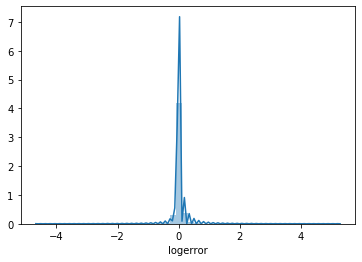

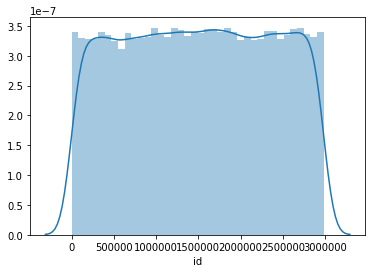

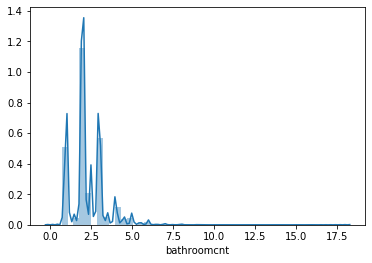

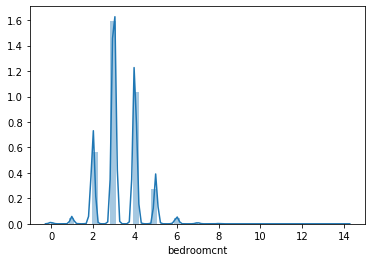

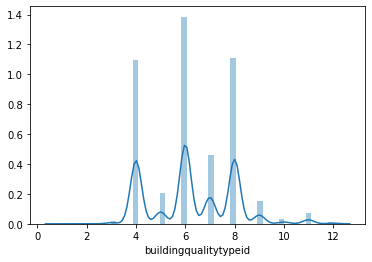

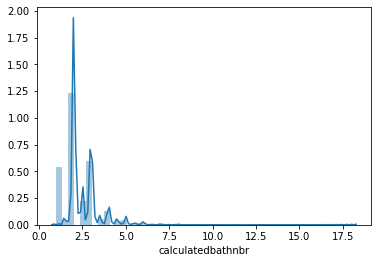

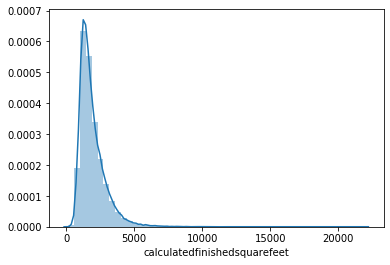

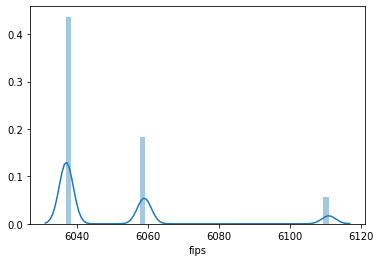

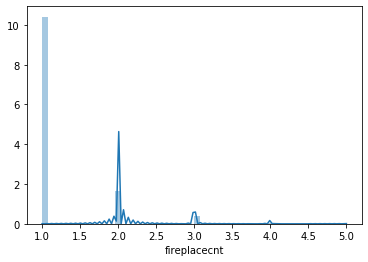

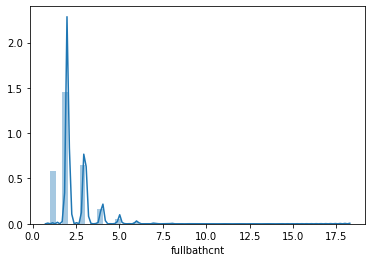

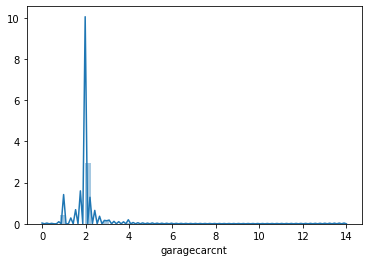

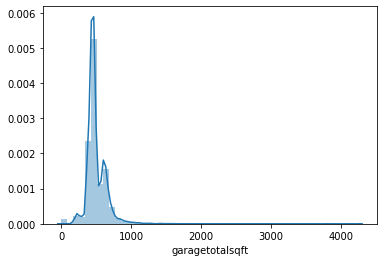

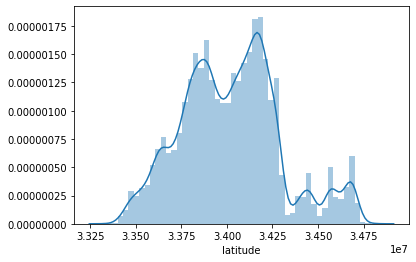

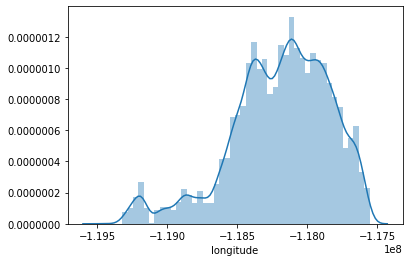

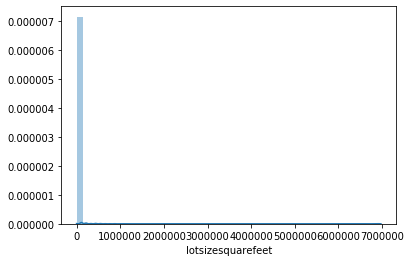

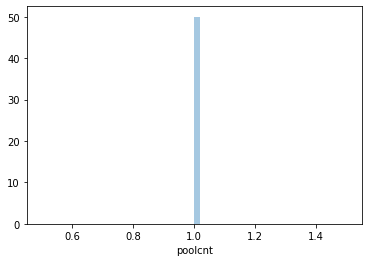

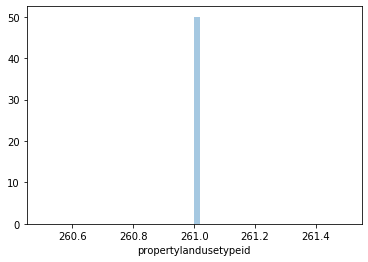

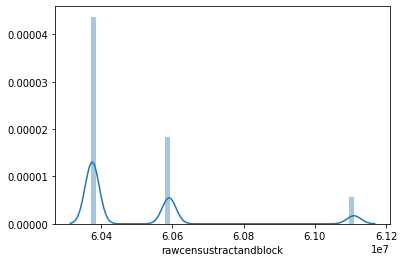

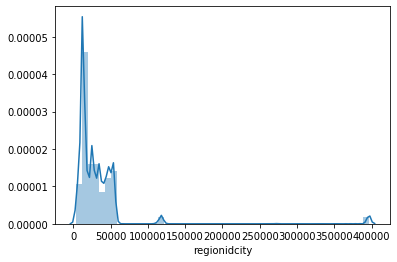

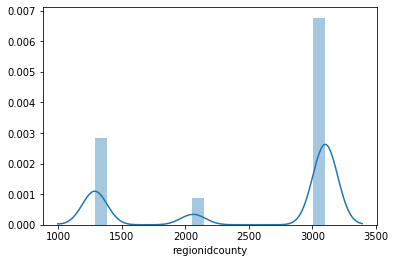

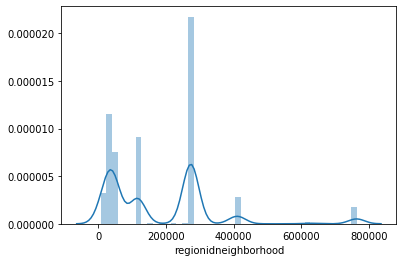

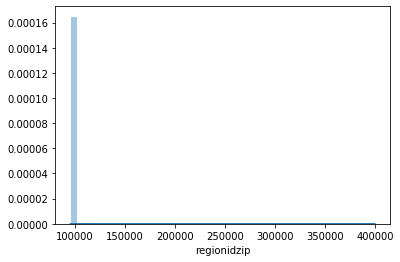

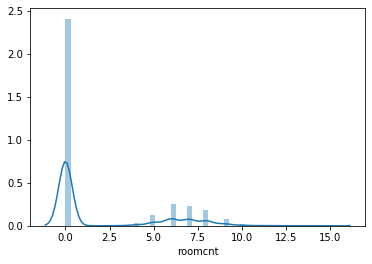

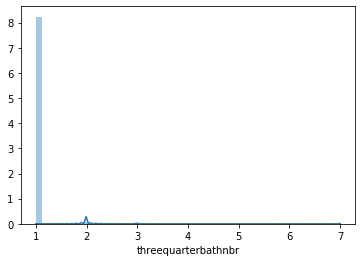

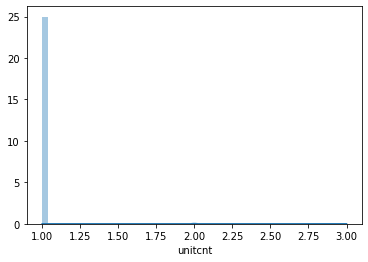

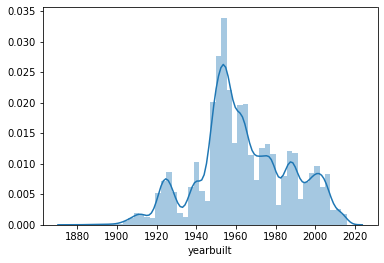

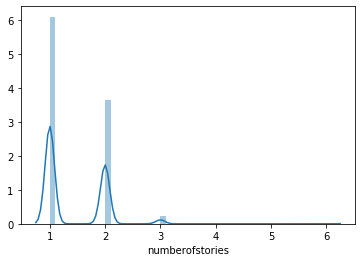

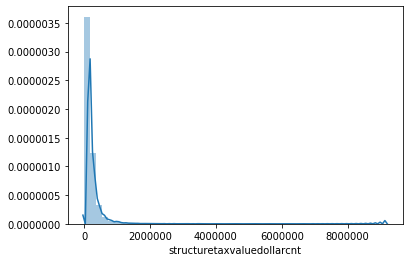

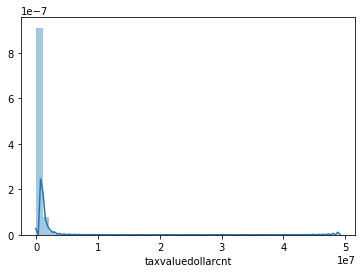

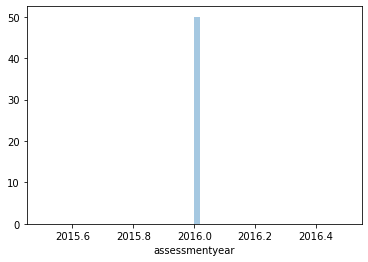

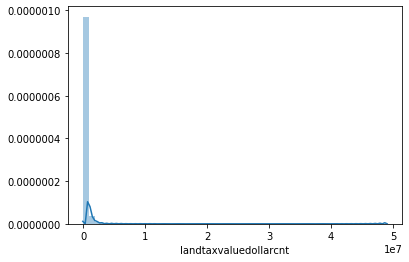

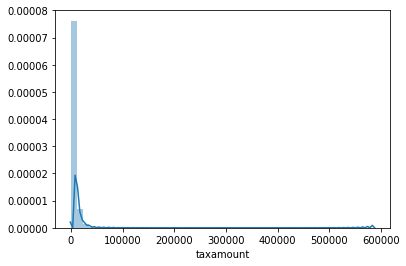

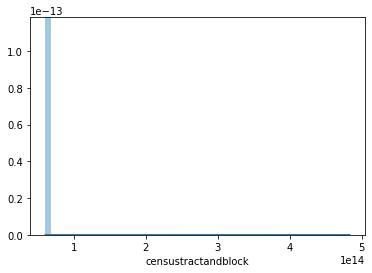

In [66]:
df_feature_dist(df)

In [45]:
features = list(df.columns)
features_num = list(df.select_dtypes(np.number).columns)
features_obj = list(df.select_dtypes(exclude=np.number).columns)

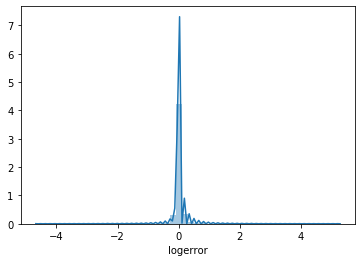

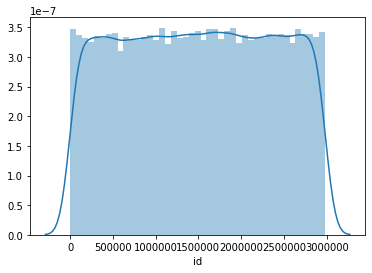

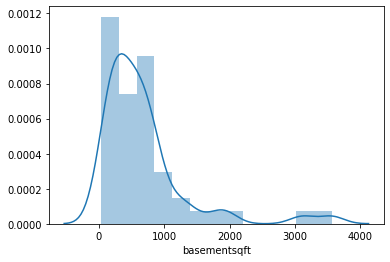

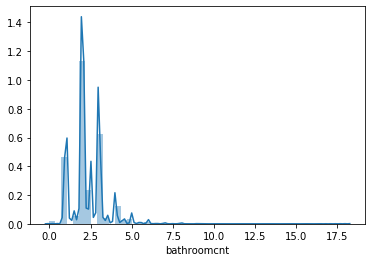

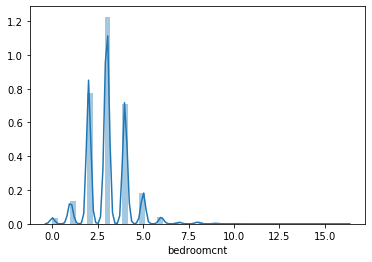

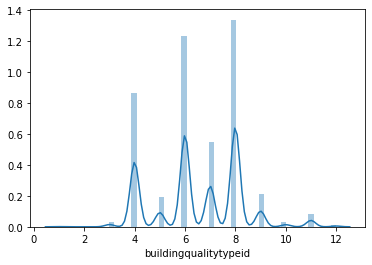

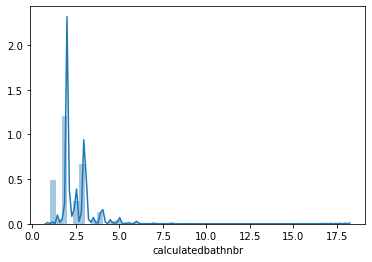

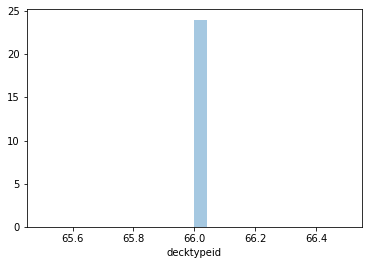

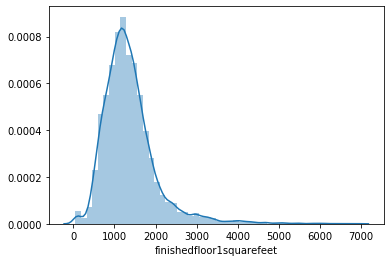

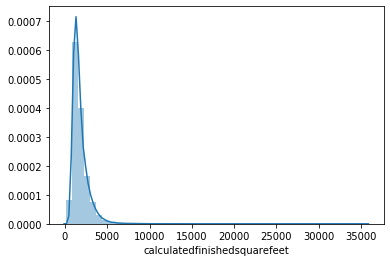

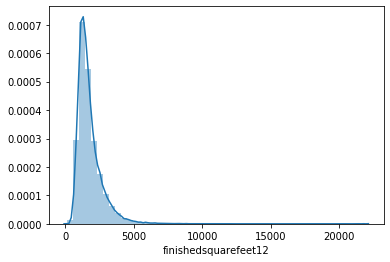

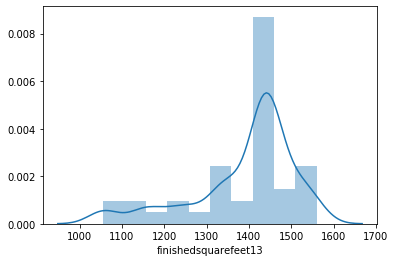

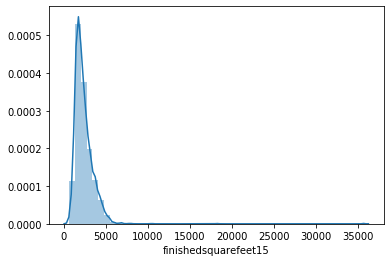

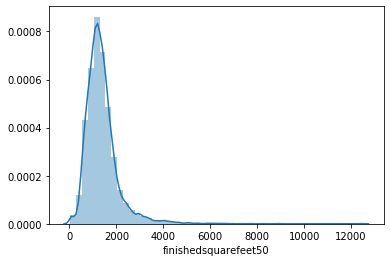

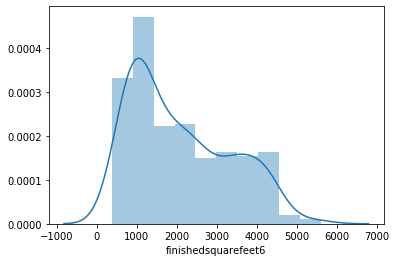

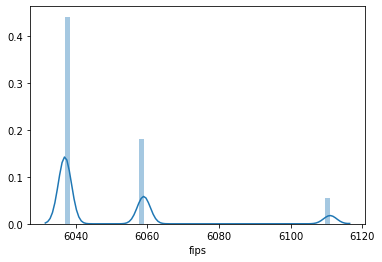

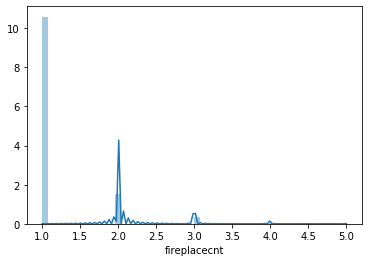

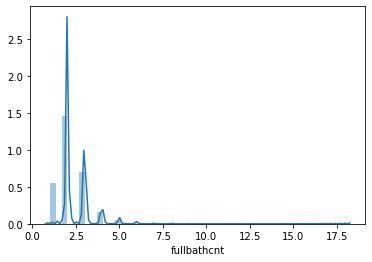

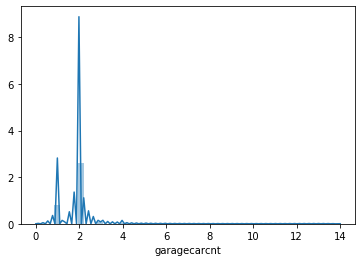

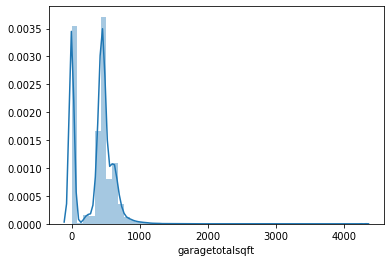

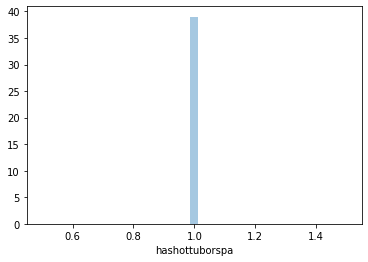

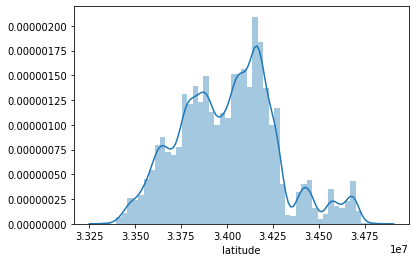

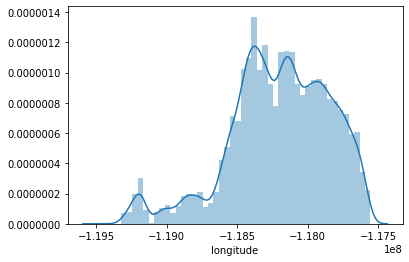

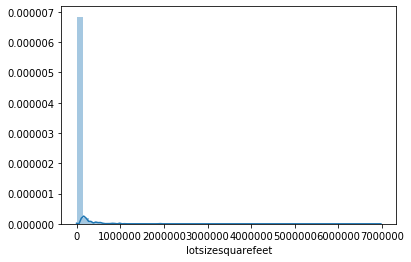

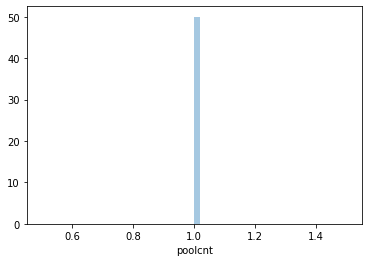

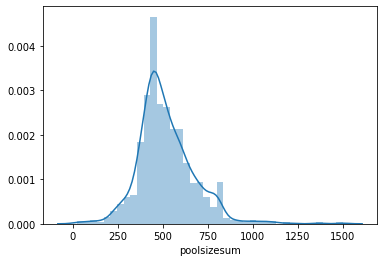

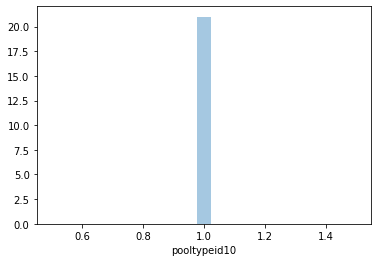

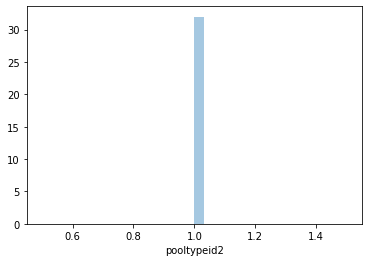

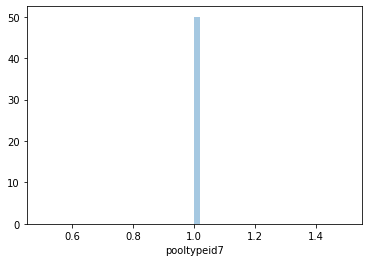

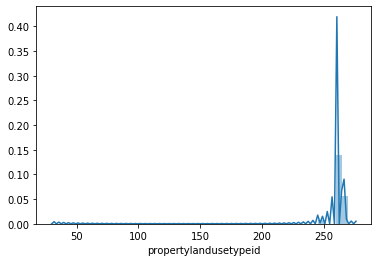

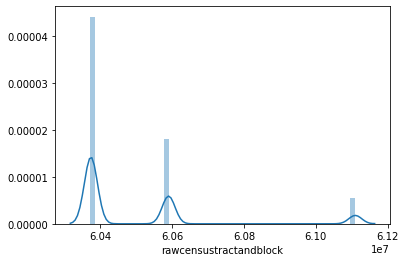

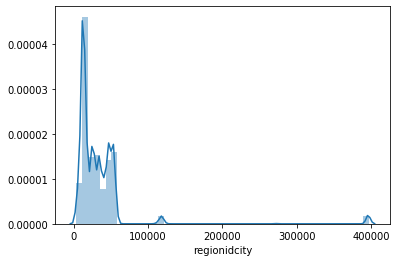

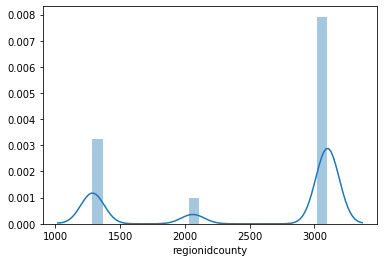

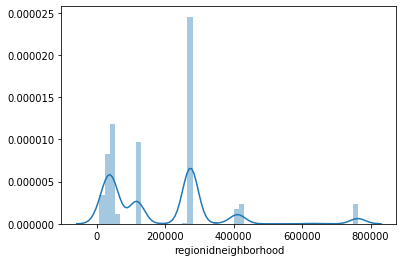

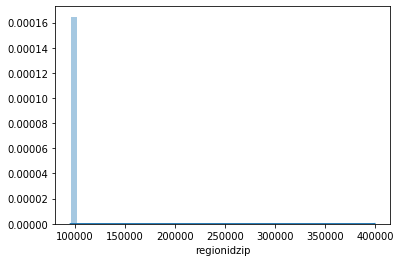

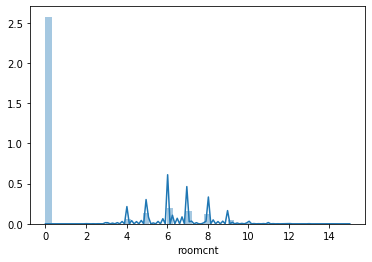

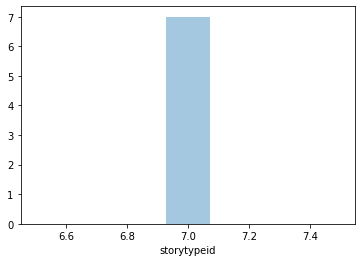

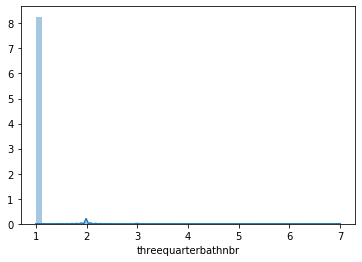

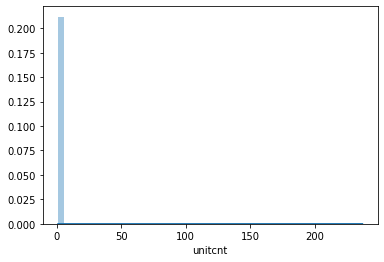

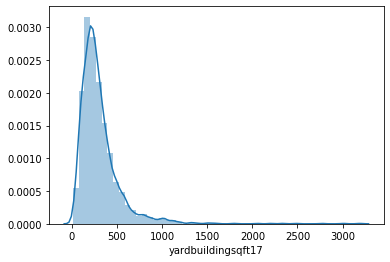

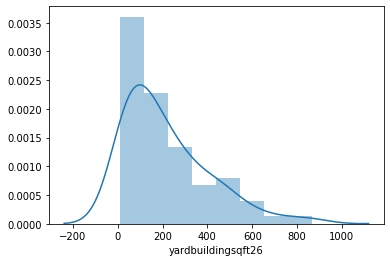

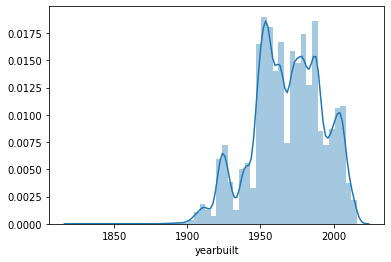

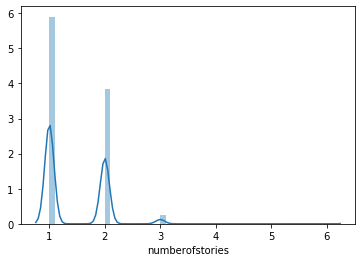

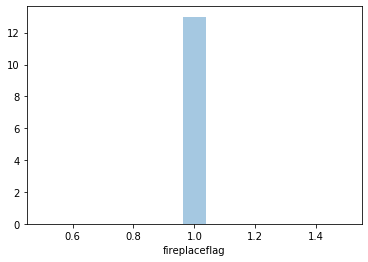

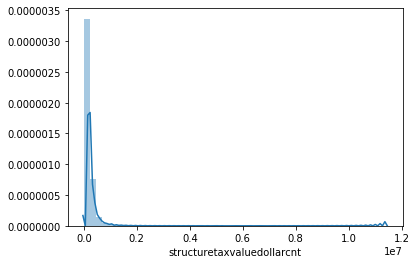

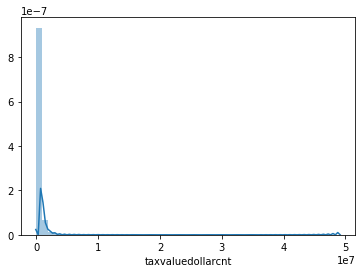

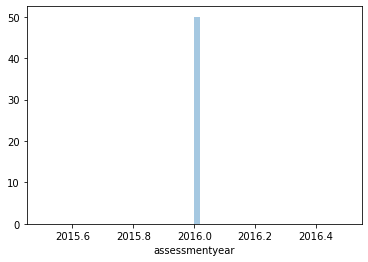

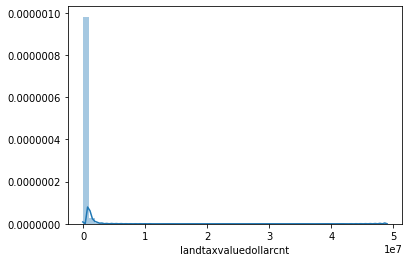

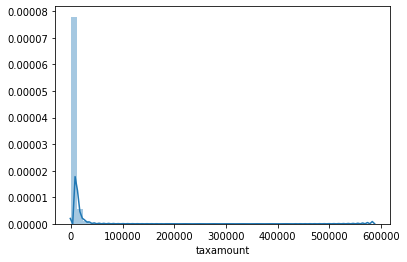

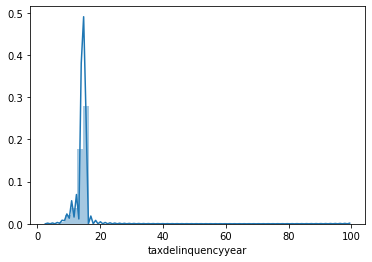

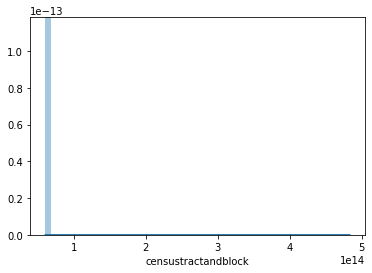

In [46]:
for feature in features_num:
    sns.distplot(df[feature].dropna())
    plt.show()

In [ ]:
import pandas as pd
import scipy.stats as stats
import numpy as np
# from aquire_zillow import get_zillow_data 

""" Remove any properties that are likely to be something other than single unit properties.
(e.g. no duplexes, no land/lot, ...). 
There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed.
You might want to use bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.
 """
def zillow_single_unit(df):
    criteria_1=df.propertylandusedesc=='Single Family Residential'
    #criteria_2=df.unitcnt==1 | df.unitcnt.isna()
    #criteria_2=df.unitcnt==1 & calculatedfinishedsquarefeet>500
    criteria_2=df.calculatedfinishedsquarefeet>500
    df=df[(criteria_1) & (criteria_2)]
    return df

""" Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).
The input:
A dataframe
A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
The output:
The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.
hint:
Look up the dropna documentation.
You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.
Make use of inplace, i.e. inplace=True/False. """

def remove_columns(df, cols_to_remove):
    df = df.drop(columns=cols_to_remove)
    return df

def handle_missing_values(df, prop_required_column = .5, prop_required_row = .60):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df



""" 3)Decide how to handle the remaining missing values:
Fill with constant value.
Impute with mean, median, mode.
Drop row/column """

def fill_missing_values(df,fill_value):
    df.fillna(fill_value)
    return df

- Keep only single unit properties. (e.g. no duplexes, no land/lot, ...)
> not only filter unitcnt
>
> consider logics like: bed#, sqft, unit type...etc.
>
> identify those with unitcnt not defined

Single Unit Properties (JQ)

Single Family Residential = 52320

Residential General = 37

Rural Residence = 0

Mobile Home = 74

Manufactured, Modular, Prefabricated Homes = 58

Inferred Single Family Residential = 0

Bungalow = 0

In [47]:
df.propertylandusedesc.value_counts(dropna=False)

Single Family Residential                     52320
Condominium                                   19294
Duplex (2 Units, Any Combination)              2009
Planned Unit Development                       1944
Quadruplex (4 Units, Any Combination)           727
Triplex (3 Units, Any Combination)              535
Cluster Home                                    333
Mobile Home                                      74
Manufactured, Modular, Prefabricated Homes       58
Residential General                              37
Cooperative                                      29
Commercial/Office/Residential Mixed Used         15
Townhouse                                         6
Name: propertylandusedesc, dtype: int64

In [53]:
df = df [df.propertylandusedesc == "Single Family Residential"]

In [54]:
df.unitcnt.value_counts(dropna=False)

1.00    33734
 nan    18558
2.00       27
3.00        1
Name: unitcnt, dtype: int64

In [55]:
# remove unit counts of two and three
df = df [(df.unitcnt != 2) | (df.unitcnt != 3)]


In [56]:
def handle_missing_values(df, prop_required_column, prop_required_row):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [57]:
df.shape

(52320, 64)

In [58]:
nulls_by_col(df)

,num_rows_missing,pct_rows_missing
finishedsquarefeet13,52320,1.00
buildingclassdesc,52320,1.00
finishedsquarefeet15,52320,1.00
storydesc,52273,1.00
storytypeid,52273,1.00
basementsqft,52273,1.00
yardbuildingsqft26,52257,1.00
architecturalstyledesc,52250,1.00
typeconstructiondesc,52244,1.00
fireplaceflag,52239,1.00


In [59]:
# remove values that are missing 99% of their values
handle_missing_values(df, .1, .1)

,county,state,logerror,transactiondate,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,latitude,longitude,lotsizesquarefeet,poolcnt,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,airconditioningdesc,heatingorsystemdesc,propertylandusedesc
parcelid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17052889,Ventura,CA,0.06,2017-01-01,1387261,1.00,2.00,nan,1.00,"1,465.00","1,465.00","6,111.00",1.00,1.00,1.00,0.00,"34,449,266.00","-119,281,531.00","12,647.00",nan,nan,1110,261.00,None,"61,110,010.02","13,091.00","2,061.00",nan,"97,099.00",5.00,nan,nan,"1,967.00",1.00,"88,000.00","464,000.00","2,016.00","376,000.00","5,672.48","61,110,010,023,006.00",None,None,Single Family Residential
17110996,Ventura,CA,0.01,2017-01-02,43675,2.50,3.00,nan,2.50,"1,371.00","1,371.00","6,111.00",nan,2.00,2.00,447.00,"34,238,229.00","-119,170,633.00","3,445.00",nan,nan,1111,261.00,None,"61,110,050.04","13,150.00","2,061.00",nan,"97,107.00",5.00,1.00,nan,"2,004.00",2.00,"99,026.00","198,054.00","2,016.00","99,028.00","2,204.84","61,110,050,041,163.00",None,None,Single Family Residential
17134185,Ventura,CA,0.06,2017-01-03,2490820,2.00,4.00,nan,2.00,"1,392.00","1,392.00","6,111.00",1.00,2.00,2.00,437.00,"34,233,486.00","-119,038,374.00","7,300.00",nan,nan,1111,261.00,None,"61,110,055.04","51,239.00","2,061.00",nan,"97,089.00",6.00,nan,nan,"1,969.00",1.00,"147,016.00","420,525.00","2,016.00","273,509.00","4,557.52","61,110,055,042,000.00",None,None,Single Family Residential
17292247,Ventura,CA,-0.42,2017-01-03,269618,2.00,3.00,nan,2.00,"1,270.00","1,270.00","6,111.00",nan,2.00,2.00,484.00,"34,139,954.00","-118,880,484.00","11,200.00",nan,nan,1110,261.00,None,"61,110,073.00","41,673.00","2,061.00",nan,"96,384.00",6.00,nan,nan,"1,957.00",1.00,"52,763.00","77,571.00","2,016.00","24,808.00","1,450.06","61,110,059,063,018.00",None,None,Single Family Residential
17141654,Ventura,CA,-0.02,2017-01-03,74982,3.00,4.00,nan,3.00,"2,342.00","2,342.00","6,111.00",2.00,3.00,3.00,828.00,"34,228,053.00","-118,982,963.00","8,644.00",nan,nan,1111,261.00,None,"61,110,053.06","51,239.00","2,061.00",nan,"97,091.00",7.00,nan,nan,"1,978.00",1.00,"261,510.00","387,648.00","2,016.00","126,138.00","4,139.18","61,110,053,061,004.00",None,None,Single Family Residential
17148798,Ventura,CA,-0.05,2017-01-03,1894799,2.00,3.00,nan,2.00,"1,346.00","1,346.00","6,111.00",1.00,2.00,2.00,504.00,"34,184,673.00","-119,206,256.00","6,275.00",nan,nan,1111,261.00,None,"61,110,088.00","13,150.00","2,061.00",nan,"97,106.00",6.00,nan,nan,"1,965.00",1.00,"134,500.00","206,909.00","2,016.00","72,409.00","2,409.36","61,110,088,001,018.00",None,None,Single Family Residential
17152676,Ventura,CA,-0.03,2017-01-03,2237758,3.00,3.00,nan,3.00,"2,728.00","2,728.00","6,111.00",2.00,3.00,2.00,532.00,"34,181,108.00","-119,222,807.00","4,000.00",nan,nan,1110,261.00,None,"61,110,036.09","13,150.00","2,061.00",nan,"97,106.00",6.00,nan,nan,"1,987.00",2.00,"280,027.00","789,179.00","2,016.00","509,152.00","10,035.88","61,110,036,093,038.00",None,None,Single Family Residential
17145540,Ventura,CA,0.00,2017-01-03,2744244,3.00,4.00,nan,3.00,"3,304.00","3,304.00","6,111.00",3.00,3.00,2.00,620.00,"34,226,399.00","-119,207,084.00","9,731.00",nan,nan,1111,261.00,None,"61,110,029.01","13,150.00","2,061.00",nan,"97,107.00",9.00,nan,nan,"1,989.00",2.00,"314,884.00","524,802.00","2,016.00","209,918.00","6,315.22","61,110,029,011,038.00",None,None,Single Family Residential
17079456,Ventura,CA,0.02,2017-01-03,2803795,1.00,2.00,nan,1.00,688.00,688.00,"6,111.00",nan,1.00,1.00,360.00,"34,273,450.00","-119,273,797.00","5,070.00",na

In [60]:
nulls_by_row(df)

,num_cols_missing,pct_cols_missing,parcelid
0,3,6.976744186046512,2
1,4,9.30232558139535,62
2,5,11.627906976744185,2176
3,6,13.953488372093023,4148
4,7,16.27906976744186,6364
5,8,18.6046511627907,17094
6,9,20.930232558139537,15412
7,10,23.25581395348837,5410
8,11,25.581395348837212,1194
9,12,27.906976744186046,265


In [61]:
df.shape

(52320, 43)

In [62]:
df.drop(columns = ["finishedsquarefeet12","pooltypeid7"], inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52320 entries, 17052889 to 14447871
Data columns (total 41 columns):
county                          52320 non-null object
state                           52320 non-null object
logerror                        52320 non-null float64
transactiondate                 52320 non-null object
id                              52320 non-null int64
bathroomcnt                     52320 non-null float64
bedroomcnt                      52320 non-null float64
buildingqualitytypeid           33655 non-null float64
calculatedbathnbr               52185 non-null float64
calculatedfinishedsquarefeet    52239 non-null float64
fips                            52320 non-null float64
fireplacecnt                    7233 non-null float64
fullbathcnt                     52185 non-null float64
garagecarcnt                    17984 non-null float64
garagetotalsqft                 17984 non-null float64
latitude                        52320 non-null float64
longitu

In [64]:
def fill_missing_values(df,fill_value):
    df.fillna(fill_value)
    return df

In [ ]:
def get_upper_outliers(s, k):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

def add_upper_outlier_columns(df, k):
    '''
    Add a column with the suffix _outliers for all the numeric columns
    in the given dataframe.
    '''
    # outlier_cols = {col + '_outliers': get_upper_outliers(df[col], k)
    #                 for col in df.select_dtypes('number')}
    # return df.assign(**outlier_cols)

    for col in df.select_dtypes('number'):
        df[col + '_outliers'] = get_upper_outliers(df[col], k)

    return df

In [ ]:
outlier_cols = [col for col in df_mall if col.endswith('_outliers')]
for col in outlier_cols:
    print('~~~\n' + col)
    data = df_mall[col][df_mall[col] > 0]
    print(data.describe())

In [19]:
df_subset = df[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'latitude', 'longitude']]
df_subset['price_per_sq_ft'] = df_subset.taxvaluedollarcnt/df_subset.calculatedfinishedsquarefeet